# Hammett Plot for pH = 11.5 ($\log{k_{OH^-}}$ vs $\sigma$)

This workbook imports the data set of kinetic parameters for the rearrangement described in the paper below. It then generates a Hammett plot for the reaction indicated in the title.

The data being pklotted is from 'On the Rearrangement in Dioxane/Water of (*Z*)-Arylhydrazones of 5-Amino-3-benzoyl-1,2,4-oxadiazole into (2-Aryl-5-phenyl-2*H*-1,2,3-triazol-4-yl)ureas: Substituent Effects on the Different Reaction Pathways." F. D'Anna, V. Frenna, G. Macaluso, S. Marullo, S. Morganti, V. Pace, D. Spinelli, R. Spisani, C. Tavani, *J. Org. Chem.*, **2006**, *71*, 5616-5624. https://doi.org/10.1021/jo0605849

The data is found in tables within the supplementary material at https://ndownloader.figstatic.com/files/4775281


## Setup Tools and Read Data Table

The libraries are imported and any functions defined

In [2]:
##############################################################
### Set up libraries and global variables
##############################################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from uncertainties import unumpy as unp
import uncertainties as un

from scipy.optimize import curve_fit

github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_23/data/"
github_location = "./data/"
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
github_location_LFER_tables = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"

result_file_name = "results.csv"


## Read Data and make Plots

We now have a data set of kinetic parameters and substituent parameters.  We can plot the log of the rate constants *vs* the Hammett $\sigma$ values and draw conclusion based on the results.

kOH
slope = 2.317 +/- 0.093
intercept = 0.099 +/- 0.055
rsq = 0.991
p = 2.68e-07

kOH
slope = -0.283 +/- 0.011
intercept = -0.003 +/- 0.004
rsq = 0.997
p = 0.0014



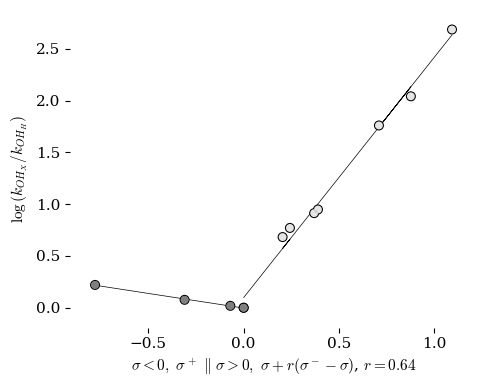

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress

def Report(comment, result):
    print(comment)
    print(f"slope = {result.slope:-.3f} +/- {result.stderr:.3f}")
    print(f"intercept = {result.intercept:-.3f} +/- {result.intercept_stderr:.3f}")
    print(f"rsq = {(result.rvalue)**2:-.3}")
    print(f"p = {(result.pvalue):-.3}")
    print("")


#Filename = github_location_LFER_tables + LFER_Data
Filename = result_file_name        ### Use when working file is being stored locally


df = pd.read_csv(Filename, 
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Substituent", 
                 comment = "#") 

#display(df)

dfcopy = df.copy()

################################################
### Electron Acceptors with YK and sigma minus
################################################


df_rhs = df.drop(["p-OCH3","p-CH3","m-CH3"])
#display(df_rhs)
sigmatype = "s_minus"   # "sigma", "s_plus", or "s_minus"
column = "kOH"  # "Ka", "kOH", "kH2O", "kH"

y_H = df[column]["H"]

r = 0.64
#x = df_rhs[sigmatype]  
x = df_rhs["sigma"]+r*(df_rhs[sigmatype]-df_rhs["sigma"])

y = np.log10(df_rhs[column] / y_H)

#print (x,y)

style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)


if sigmatype == "s_plus":
    x_label = r"$\sigma^+$"
elif sigmatype == "s_minus":
    x_label = r"$\sigma^-$"
elif sigmatype == "sigma":
    x_label = r"$\sigma$"
else:
    x_label = "ERROR"

#x_label = r"$\sigma + r(\sigma^--\sigma)$, $r = "+str(r)+r"$"
x_label = r"$\sigma<0,\ \sigma^+\ \|\ \sigma>0,\ \sigma + r(\sigma^--\sigma)$, $r = "+str(r)+r"$"

#y_label = r"$\log{\frac{k_{OH_X}}{k_{OH_H}}}$"
y_label = r"$\log{(k_{OH_X} / k_{OH_H})}$"

ax.set(
#    title="Yukawa-Tsuno Plot",       
          ylabel=y_label, 
          xlabel=x_label,                
#          xlim=[-.9,.9],                  
#          ylim=[-3.7,-2.7]
       )


##############################

linfit = linregress(x,y)
fity = linfit.slope * x + linfit.intercept

ax.plot(x, fity, color='black', zorder=1, linewidth=0.5)

ax.scatter(x,y, s=52, color="black", marker='o', edgecolors = "none", zorder=3)
ax.scatter(x,y, s=32, color="white", marker='o', edgecolors = "none", zorder=3)
ax.scatter(x,y, s=32, color="black", marker='o', edgecolors = "none", alpha = 0.1, zorder=3)


Report(column, linfit)   # use the 'Report' function to output the line fit parameters


################################################
### Electron Donors with YK and sigma plus
################################################

df_lhs = df.drop(["p-Cl","p-Br","m-Cl","m-Br","p-CN","m-NO2","p-NO2"])






#display(df_lhs)
sigmatype = "s_plus"   # "sigma", "s_plus", or "s_minus"
column = "kOH"  # "Ka", "kOH", "kH2O", "kH"

r = 1
#x = df_lhs[sigmatype]  
x = df_lhs["sigma"]+r*(df_lhs[sigmatype]-df_lhs["sigma"])

y = np.log10(df_lhs[column] / y_H)


##############################

linfit = linregress(x,y)
fity = linfit.slope * x + linfit.intercept

ax.plot(x, fity, color='black', zorder=1, linewidth=0.5)

ax.scatter(x,y, s=52, color="black", marker='o', edgecolors = "none", zorder=3)
ax.scatter(x,y, s=32, color="white", marker='o', edgecolors = "none", zorder=3)
ax.scatter(x,y, s=32, color="black", marker='o', edgecolors = "none", alpha = 0.5, zorder=3)


Report(column, linfit)   # use the 'Report' function to output the line fit parameters



###############################################################################
fig.savefig("images/plotYK_kOH_part3_1.pdf")   # use this to save the figure in PDF format
plt.show()


kOH
slope = 2.317 +/- 0.093
intercept = 0.099 +/- 0.055
rsq = 0.991
p = 2.68e-07

kOH
slope = -0.819 +/- 0.197
intercept = -0.024 +/- 0.032
rsq = 0.897
p = 0.0532



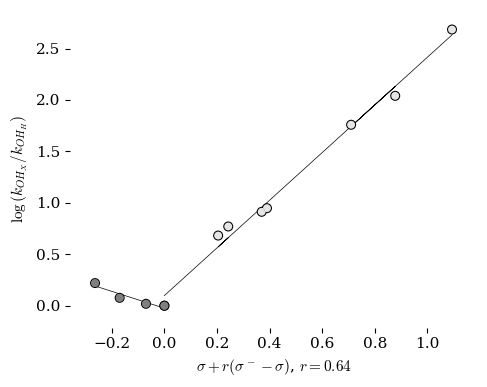

In [4]:
### USING r =0.64 for everything

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress

def Report(comment, result):
    print(comment)
    print(f"slope = {result.slope:-.3f} +/- {result.stderr:.3f}")
    print(f"intercept = {result.intercept:-.3f} +/- {result.intercept_stderr:.3f}")
    print(f"rsq = {(result.rvalue)**2:-.3}")
    print(f"p = {(result.pvalue):-.3}")
    print("")


#Filename = github_location_LFER_tables + LFER_Data
Filename = result_file_name        ### Use when working file is being stored locally


df = pd.read_csv(Filename, 
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Substituent", 
                 comment = "#") 

#display(df)

dfcopy = df.copy()

################################################
### Electron Acceptors with YK and sigma minus
################################################


df_rhs = df.drop(["p-OCH3","p-CH3","m-CH3"])
#display(df_rhs)
sigmatype = "s_minus"   # "sigma", "s_plus", or "s_minus"
column = "kOH"  # "Ka", "kOH", "kH2O", "kH"

y_H = df[column]["H"]

r = 0.64
#x = df_rhs[sigmatype]  
x = df_rhs["sigma"]+r*(df_rhs[sigmatype]-df_rhs["sigma"])

y = np.log10(df_rhs[column] / y_H)

#print (x,y)

style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)


if sigmatype == "s_plus":
    x_label = r"$\sigma^+$"
elif sigmatype == "s_minus":
    x_label = r"$\sigma^-$"
elif sigmatype == "sigma":
    x_label = r"$\sigma$"
else:
    x_label = "ERROR"

#x_label = r"$\sigma + r(\sigma^--\sigma)$, $r = "+str(r)+r"$"
x_label = r"$\sigma + r(\sigma^--\sigma)$, $r = "+str(r)+r"$"

#y_label = r"$\log{\frac{k_{OH_X}}{k_{OH_H}}}$"
y_label = r"$\log{(k_{OH_X} / k_{OH_H})}$"

ax.set(
#    title="Yukawa-Tsuno Plot",       
          ylabel=y_label, 
          xlabel=x_label,                
#          xlim=[-.9,.9],                  
#          ylim=[-3.7,-2.7]
       )


##############################

linfit = linregress(x,y)
fity = linfit.slope * x + linfit.intercept

ax.plot(x, fity, color='black', zorder=1, linewidth=0.5)

ax.scatter(x,y, s=52, color="black", marker='o', edgecolors = "none", zorder=3)
ax.scatter(x,y, s=32, color="white", marker='o', edgecolors = "none", zorder=3)
ax.scatter(x,y, s=32, color="black", marker='o', edgecolors = "none", alpha = 0.1, zorder=3)


Report(column, linfit)   # use the 'Report' function to output the line fit parameters


################################################
### Electron Donors with YK and sigma plus
################################################

df_lhs = df.drop(["p-Cl","p-Br","m-Cl","m-Br","p-CN","m-NO2","p-NO2"])






#display(df_lhs)
sigmatype = "s_minus"   # "sigma", "s_plus", or "s_minus"
column = "kOH"  # "Ka", "kOH", "kH2O", "kH"

#r = 1
#x = df_lhs[sigmatype]  
x = df_lhs["sigma"]+r*(df_lhs[sigmatype]-df_lhs["sigma"])

y = np.log10(df_lhs[column] / y_H)


##############################

linfit = linregress(x,y)
fity = linfit.slope * x + linfit.intercept

ax.plot(x, fity, color='black', zorder=1, linewidth=0.5)

ax.scatter(x,y, s=52, color="black", marker='o', edgecolors = "none", zorder=3)
ax.scatter(x,y, s=32, color="white", marker='o', edgecolors = "none", zorder=3)
ax.scatter(x,y, s=32, color="black", marker='o', edgecolors = "none", alpha = 0.5, zorder=3)


Report(column, linfit)   # use the 'Report' function to output the line fit parameters



###############################################################################
fig.savefig("images/plotYK_kOH_part3_2.pdf")   # use this to save the figure in PDF format
plt.show()





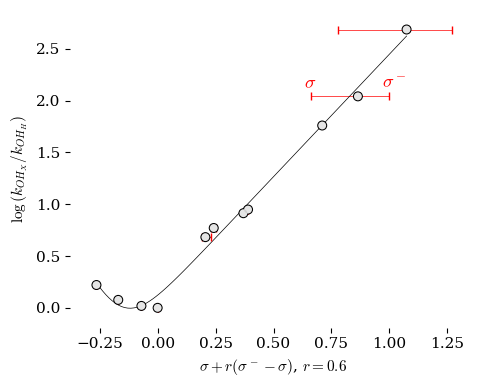

OMe -------------------
rho1: -4.19765+/-1.92837 
rho2: 2.36397+/-0.10449 
int1: -0.94659+/-0.47462 
int2: 0.08348+/-0.06437 
r_squared: 0.99259 


In [7]:
### USING r =0.64 for everything

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress

def Report(comment, result):
    print(comment)
    print(f"slope = {result.slope:-.3f} +/- {result.stderr:.3f}")
    print(f"intercept = {result.intercept:-.3f} +/- {result.intercept_stderr:.3f}")
    print(f"rsq = {(result.rvalue)**2:-.3}")
    print(f"p = {(result.pvalue):-.3}")
    print("")

def addingHammett(x, rho1, int1, rho2, int2):
    y_rx1 = rho1*x + int1
    y_rx2 = rho2*x + int2
    y_combined = np.log10(10**y_rx1+10**y_rx2)
    return(y_combined)

#Filename = github_location_LFER_tables + LFER_Data
Filename = result_file_name        ### Use when working file is being stored locally


df = pd.read_csv(Filename, 
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Substituent", 
                 comment = "#") 

#display(df)

dfcopy = df.copy()

################################################
### Electron Acceptors with YK and sigma minus
################################################


df_rhs = df
#display(df_rhs)
sigmatype = "s_minus"   # "sigma", "s_plus", or "s_minus"
column = "kOH"  # "Ka", "kOH", "kH2O", "kH"

y_H = df[column]["H"]

r = 0.60
#x = df_rhs[sigmatype]  
x = df_rhs["sigma"]+r*(df_rhs[sigmatype]-df_rhs["sigma"])

y = np.log10(df_rhs[column] / y_H)

#print (x,y)

style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)


if sigmatype == "s_plus":
    x_label = r"$\sigma^+$"
elif sigmatype == "s_minus":
    x_label = r"$\sigma^-$"
elif sigmatype == "sigma":
    x_label = r"$\sigma$"
else:
    x_label = "ERROR"

#x_label = r"$\sigma + r(\sigma^--\sigma)$, $r = "+str(r)+r"$"
x_label = r"$\sigma + r(\sigma^--\sigma)$, $r = "+str(r)+r"$"

#y_label = r"$\log{\frac{k_{OH_X}}{k_{OH_H}}}$"
y_label = r"$\log{(k_{OH_X} / k_{OH_H})}$"

ax.set(
#    title="Yukawa-Tsuno Plot",       
          ylabel=y_label, 
          xlabel=x_label,                
#          xlim=[-.9,.9],                  
#          ylim=[-3.7,-2.7]
       )


##############################

popt, pcov = curve_fit(addingHammett, x, y,
                       bounds = ([-10,-100,-10,-100],[10,100,10,100])
                       )
[rho1, int1, rho2, int2] = un.correlated_values(popt, pcov)

x_span = np.linspace(np.min(x),np.max(x),100)
fity = addingHammett(x_span, *popt)
plt.plot(x_span, fity, color='black', zorder=1, linewidth=0.5)

ax.scatter(x,y, s=52, color="black", marker='o', edgecolors = "none", zorder=3)
ax.scatter(x,y, s=32, color="white", marker='o', edgecolors = "none", zorder=3)
ax.scatter(x,y, s=32, color="black", marker='o', edgecolors = "none", alpha = 0.1, zorder=3)


#Report(column, linfit)   # use the 'Report' function to output the line fit parameters

################################################################################
### Plot extra points. here we add in points using the sigma values only for comparison purposes
################################################################################

ax.scatter(df_rhs["s_minus"],y, color="red", marker='|', zorder=1)
#ax.scatter(df_rhs["s_plus"],y, color="red", marker='|', zorder=1)
ax.scatter(df_rhs["sigma"],y, color="red", marker='|', zorder=1)

################################################################################
### Add text to identify the extra markers
################################################################################

ax.text(0.63,2.12,r"$\sigma$", size = "large", color = "red")
ax.text(0.97,2.12,r"$\sigma^-$", size = "large", color = "red")

################################################################################
### get fancy and add horizontal lines to connect alternate points with hammett sigma points.
################################################################################

if True:                  # An easy switch to turn this on or off. 'True' for on, 'False' for off.
    for n in df_rhs.index:
        yhline = y[n]
        start = df_rhs["s_minus"][n]
        end = df_rhs["sigma"][n]
        ax.hlines(yhline, start, end, 
                  color='red', zorder=0, linewidth=0.5)



###############################################################################
fig.savefig("images/plotYK_kOH_part3_3.pdf")   # use this to save the figure in PDF format
plt.show()


def addingHammett(x, rho1, int1, rho2, int2):
    y_rx1 = rho1*x + int1
    y_rx2 = rho2*x + int2
    y_combined = np.log10(10**y_rx1+10**y_rx2)
    return(y_combined)


print("OMe -------------------")
print(f"rho1: {rho1:0.5f} ")
print(f"rho2: {rho2:0.5f} ")
print(f"int1: {int1:0.5f} ")
print(f"int2: {int2:0.5f} ")

### RSQ calc from https://stackoverflow.com/questions/19189362/getting-the-r-squared-value-using-curve-fit
y_calc = addingHammett(x, *popt)

residuals = y-y_calc
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)

print(f"r_squared: {r_squared:0.5f} ")

The optimal value for r is 0.600 for rsq = -0.99259


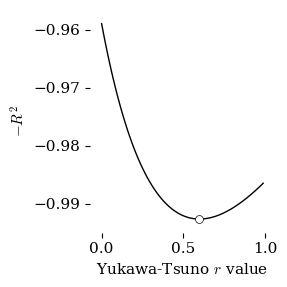

In [9]:
# YUKAWA-TSUNO DETERMINATION 

from scipy.optimize import minimize_scalar

def addingHammett(x, rho1, int1, rho2, int2):
    y_rx1 = rho1*x + int1
    y_rx2 = rho2*x + int2
    y_combined = np.log10(10**y_rx1+10**y_rx2)
    return(y_combined)

def RSQ_function(r):    # returns the RSQ for linefits using the given Yukawa-Tsuno r factor
    s = df["sigma"] + r*(df["s_minus"]-df["sigma"])
    x = s   
    
    popt, pcov = curve_fit(addingHammett, x, y)
    y_calc = addingHammett(x, *popt)

    ### RSQ calc from https://stackoverflow.com/questions/19189362/getting-the-r-squared-value-using-curve-fit
    residuals = y-y_calc
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)

    return(-r_squared)


##########################################################
### Calculate the value of -RSQ as the value of r is varied 
##########################################################

rsq_range=[]
r_range = np.arange(0, 1, 0.01)
for r in r_range:
    rsq = RSQ_function(r)
    rsq_range.append(rsq)

##########################################################
### Plot the value of -RSQ as the value of r is varied 
##########################################################

style_file = "tufte.mplstyle"
#style_file = "S2_classic2.mplstyle"
plt.style.use(github_location_styles + style_file)        

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,3))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   
ax.set(ylabel=r"$-R^2$", 
       xlabel=r"Yukawa-Tsuno $r$ value")

ax.plot(r_range,rsq_range)

##################################################
### Determine optimal r value to minimize -RSQ 
##################################################

r_opt = minimize_scalar(RSQ_function)
print(f"The optimal value for r is {r_opt['x']:0.3f} for rsq = {r_opt['fun']:0.5f}")

ax.scatter(r_opt['x'],r_opt['fun'], s=32, color="white", marker='o', 
           edgecolor = "black", linewidth = 0.5, zorder=3)

fig.savefig("images/plotYK_kOH_rhs_r_part3.pdf")   # use this to save the figure in PDF format
plt.show()




kOH
slope = 2.186 +/- 0.062
intercept = 0.122 +/- 0.033
rsq = 0.993
p = 5.75e-11



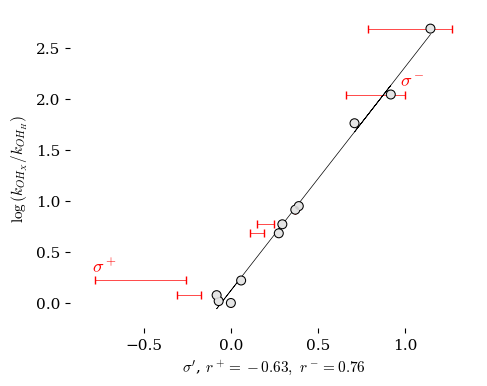

In [10]:
### NEGATIVE INGOLD YUKAWA TSUNO VALUES

### USING r =0.64 for everything

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress

def Report(comment, result):
    print(comment)
    print(f"slope = {result.slope:-.3f} +/- {result.stderr:.3f}")
    print(f"intercept = {result.intercept:-.3f} +/- {result.intercept_stderr:.3f}")
    print(f"rsq = {(result.rvalue)**2:-.3}")
    print(f"p = {(result.pvalue):-.3}")
    print("")


#Filename = github_location_LFER_tables + LFER_Data
Filename = result_file_name        ### Use when working file is being stored locally


df = pd.read_csv(Filename, 
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Substituent", 
                 comment = "#") 

#display(df)


################################################
### Electron Acceptors with YK and sigma minus
################################################


column = "kOH"  # "Ka", "kOH", "kH2O", "kH"

y_H = df[column]["H"]

r_minus = 0.76
r_plus = -0.63

x = df["sigma"] + r_minus*(df["s_minus"]-df["sigma"]) + r_plus*(df["s_plus"]-df["sigma"])

y = np.log10(df[column] / y_H)

#print (x,y)

style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)

x_label = r"$\sigma^\prime$, $r^+ = "+str(r_plus)+r",\ r^- = "+str(r_minus)+r"$"

y_label = r"$\log{(k_{OH_X} / k_{OH_H})}$"

ax.set(
#    title="Yukawa-Tsuno Plot",       
          ylabel=y_label, 
          xlabel=x_label,                
#          xlim=[-.9,.9],                  
#          ylim=[-3.7,-2.7]
       )


##############################

linfit = linregress(x,y)
fity = linfit.slope * x + linfit.intercept

ax.plot(x, fity, color='black', zorder=1, linewidth=0.5)

ax.scatter(x,y, s=52, color="black", marker='o', edgecolors = "none", zorder=3)
ax.scatter(x,y, s=32, color="white", marker='o', edgecolors = "none", zorder=3)
ax.scatter(x,y, s=32, color="black", marker='o', edgecolors = "none", alpha = 0.1, zorder=3)


################################################################################
### Plot extra points. here we add in points using the sigma values only for comparison purposes
################################################################################

ax.scatter(df["s_minus"],y, color="red", marker='|', zorder=1)
ax.scatter(df["s_plus"],y, color="red", marker='|', zorder=1)
#ax.scatter(df["sigma"],y, color="blue", marker='|', zorder=1)

################################################################################
### Add text to identify the extra markers
################################################################################

ax.text(-0.80,0.30,r"$\sigma^+$", size = "large", color = "red")
ax.text(0.97,2.12,r"$\sigma^-$", size = "large", color = "red")

################################################################################
### get fancy and add horizontal lines to connect alternate points with hammett sigma points.
################################################################################

if True:                  # An easy switch to turn this on or off. 'True' for on, 'False' for off.
    for n in df.index:
        yhline = y[n]
        start = df["s_minus"][n]
        end = df["s_plus"][n]
        ax.hlines(yhline, start, end, 
                  color='red', zorder=0, linewidth=0.5)



Report(column, linfit)   # use the 'Report' function to output the line fit parameters






###############################################################################
fig.savefig("images/plotYK_kOH_part3_4.pdf")   # use this to save the figure in PDF format
plt.show()





The optimal value for r+ is -0.625 and for r- is 0.757 for rsq = -0.99285


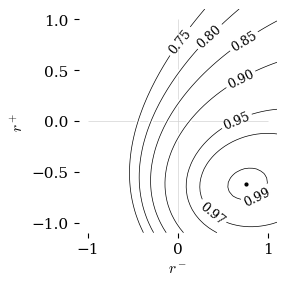

In [11]:
# INGOLD-YUKAWA-TSUNO DETERMINATION
from scipy.optimize import minimize
from scipy.optimize import minimize_scalar

################################################################################
### Define a function to be minimized
################################################################################

def RSQ_function(params):       # returns the RSQ for linefits using the given Yukawa-Tsuno r factor
    r_minus, r_plus = params    # extract values from params list
    x = df["sigma"] + r_minus*(df["s_minus"]-df["sigma"]) + r_plus*(df["s_plus"]-df["sigma"])
    linfit = linregress(x,y)    # y is the set of y values from above
    return -(linfit.rvalue**2)



################################################################################
### optimize the param list to obtain the minimum result of the function.
################################################################################

r_opt = minimize(RSQ_function, [1,1])
#print(r_opt)
r_minus, r_plus = r_opt['x']
print(f"The optimal value for r+ is {r_plus:0.3f} and for r- is {r_minus:0.3f} for rsq = {r_opt['fun']:0.5f}")

################################################################################
### Create a plot object
################################################################################

style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,3))  
ax.margins(x=.07, y=.07, tight=True)

ax.set(
#    title="Yukawa-Tsuno Plot",       
          ylabel=r"$r^+$", 
          xlabel=r"$r^-$",                
#          xlim=[-.9,.9],                  
#          ylim=[-3.7,-2.7]
         )

################################################################################
### use the function to caluate the RSQ for the line fit at every value of r+ and r-
## and then plot the result as a contour plot
################################################################################

rpluslist = np.linspace(-1.1,1.1,50)
rminuslist = rpluslist.copy()          #  vary r_plus and r_minus from -1.1 to +1.1

### This loop cycles through all the pairings of r+ and r- and calculates RSQ for each case
l1 = []                                
for rplus in rpluslist:
    l2 = []
    for rminus in rminuslist:
        rsq = RSQ_function([rminus,rplus])    
        l2.append(rsq)
    l1.append(l2)
l3 = np.matrix(l1)
#print(l3)

### Set up contour plot
X, Y = np.meshgrid(rpluslist, rminuslist)
levels = [0.75, 0.80, 0.85, 0.90, 0.95, 0.97, 0.99]

### plot lines along the x and y axes
ax.hlines(0,-1,1, color = "lightgray", zorder = 1, linewidths=0.5)
ax.vlines(0,-1,1, color = "lightgray", zorder = 1, linewidths=0.5)

### Plot the contour lines as thick white lines 
ax.contour(X, Y, -l3, levels, colors = "white", linewidths=3, zorder = 2)

### Create contour plot as 'CS' and then plot 'CS' with lables
CS = ax.contour(X, Y, -l3, levels, colors = "black", linewidths=0.5, zorder = 2)
ax.clabel(CS, inline=True, fontsize=9)

### Plot the true minimum value as a point
#ax.plot(r_minus,r_plus,"o", color="white", markeredgecolor = "black", markeredgewidth = 0.5, markersize = 3)
ax.plot(r_minus,r_plus,"o", color="black", markersize = 2)


################################################################################
### Output the plot to a pdf file and show it in this notebook.
################################################################################


fig.savefig("images/plotIYK_Fig2_r+r-_opt_part3.pdf")   # use this to save the figure in PDF format

plt.show()



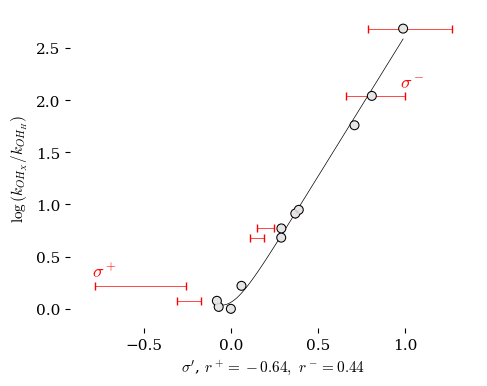

OMe -------------------
rho1: 2.69673+/-0.10679 
rho2: -3.37222+/-3.30640 
int1: -0.08085+/-0.06696 
int2: -0.49037+/-0.28387 
r_squared: 0.99567 


In [29]:
### IYK PLOT with CURVE

### NEGATIVE INGOLD YUKAWA TSUNO VALUES

### USING r =0.64 for everything

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress

def Report(comment, result):
    print(comment)
    print(f"slope = {result.slope:-.3f} +/- {result.stderr:.3f}")
    print(f"intercept = {result.intercept:-.3f} +/- {result.intercept_stderr:.3f}")
    print(f"rsq = {(result.rvalue)**2:-.3}")
    print(f"p = {(result.pvalue):-.3}")
    print("")

def addingHammett(x, rho1, int1, rho2, int2):
    y_rx1 = rho1*x + int1
    y_rx2 = rho2*x + int2
    y_combined = np.log10(10**y_rx1+10**y_rx2)
    return(y_combined)

#Filename = github_location_LFER_tables + LFER_Data
Filename = result_file_name        ### Use when working file is being stored locally


df = pd.read_csv(Filename, 
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Substituent", 
                 comment = "#") 

#display(df)


################################################
### Electron Acceptors with YK and sigma minus
################################################


column = "kOH"  # "Ka", "kOH", "kH2O", "kH"

y_H = df[column]["H"]

r_minus = 0.44
r_plus = -0.64

x = df["sigma"] + r_minus*(df["s_minus"]-df["sigma"]) + r_plus*(df["s_plus"]-df["sigma"])

y = np.log10(df[column] / y_H)

#print (x,y)

style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)

x_label = r"$\sigma^\prime$, $r^+ = "+str(r_plus)+r",\ r^- = "+str(r_minus)+r"$"

y_label = r"$\log{(k_{OH_X} / k_{OH_H})}$"

ax.set(
#    title="Yukawa-Tsuno Plot",       
          ylabel=y_label, 
          xlabel=x_label,                
#          xlim=[-.9,.9],                  
#          ylim=[-3.7,-2.7]
       )


##############################

popt, pcov = curve_fit(addingHammett, x, y,
                       bounds = ([-1000,-100,-10,-100],[1000,100,10,100])
                       )
[rho1, int1, rho2, int2] = un.correlated_values(popt, pcov)

x_span = np.linspace(np.min(x),np.max(x),100)
fity = addingHammett(x_span, *popt)
plt.plot(x_span, fity, color='black', zorder=1, linewidth=0.5)

ax.scatter(x,y, s=52, color="black", marker='o', edgecolors = "none", zorder=3)
ax.scatter(x,y, s=32, color="white", marker='o', edgecolors = "none", zorder=3)
ax.scatter(x,y, s=32, color="black", marker='o', edgecolors = "none", alpha = 0.1, zorder=3)


################################################################################
### Plot extra points. here we add in points using the sigma values only for comparison purposes
################################################################################

ax.scatter(df["s_minus"],y, color="red", marker='|', zorder=1)
ax.scatter(df["s_plus"],y, color="red", marker='|', zorder=1)
#ax.scatter(df["sigma"],y, color="blue", marker='|', zorder=1)

################################################################################
### Add text to identify the extra markers
################################################################################

ax.text(-0.80,0.30,r"$\sigma^+$", size = "large", color = "red")
ax.text(0.97,2.12,r"$\sigma^-$", size = "large", color = "red")

################################################################################
### get fancy and add horizontal lines to connect alternate points with hammett sigma points.
################################################################################

if True:                  # An easy switch to turn this on or off. 'True' for on, 'False' for off.
    for n in df.index:
        yhline = y[n]
        start = df["s_minus"][n]
        end = df["s_plus"][n]
        ax.hlines(yhline, start, end, 
                  color='red', zorder=0, linewidth=0.5)



#Report(column, linfit)   # use the 'Report' function to output the line fit parameters






###############################################################################
fig.savefig("images/plotYK_kOH_part3_5.pdf")   # use this to save the figure in PDF format
plt.show()


print("OMe -------------------")
print(f"rho1: {rho1:0.5f} ")
print(f"rho2: {rho2:0.5f} ")
print(f"int1: {int1:0.5f} ")
print(f"int2: {int2:0.5f} ")

### RSQ calc from https://stackoverflow.com/questions/19189362/getting-the-r-squared-value-using-curve-fit
y_calc = addingHammett(x, *popt)

residuals = y-y_calc
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)

print(f"r_squared: {r_squared:0.5f} ")


The optimal value for r+ is -0.635 and for r- is 0.437 for rsq = -0.99574


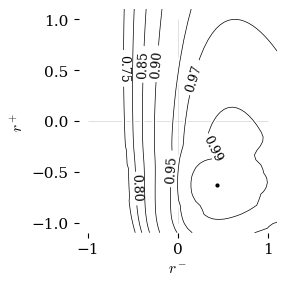

In [27]:
# INGOLD-YUKAWA-TSUNO DETERMINATION
from scipy.optimize import minimize
from scipy.optimize import minimize_scalar

################################################################################
### Define a function to be minimized
################################################################################

def addingHammett(x, rho1, int1, rho2, int2):
    y_rx1 = rho1*x + int1
    y_rx2 = rho2*x + int2
    y_combined = np.log10(10**y_rx1+10**y_rx2)
    return(y_combined)

def RSQ_function(params):       # returns the RSQ for linefits using the given Yukawa-Tsuno r factor
    r_minus, r_plus = params    # extract values from params list
    x = df["sigma"] + r_minus*(df["s_minus"]-df["sigma"]) + r_plus*(df["s_plus"]-df["sigma"])

    popt, pcov = curve_fit(addingHammett, x, y,
                       bounds = ([-10,-100,-10,-100],[10,100,10,100])
                       )
    
    y_calc = addingHammett(x, *popt)

    residuals = y-y_calc
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)

    return -(r_squared)



################################################################################
### optimize the param list to obtain the minimum result of the function.
################################################################################

r_opt = minimize(RSQ_function, x0 = [1,1])
#print(r_opt)
r_minus, r_plus = r_opt['x']
print(f"The optimal value for r+ is {r_plus:0.3f} and for r- is {r_minus:0.3f} for rsq = {r_opt['fun']:0.5f}")

################################################################################
### Create a plot object
################################################################################

style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,3))  
ax.margins(x=.07, y=.07, tight=True)

ax.set(
#    title="Yukawa-Tsuno Plot",       
          ylabel=r"$r^+$", 
          xlabel=r"$r^-$",                
#          xlim=[-.9,.9],                  
#          ylim=[-3.7,-2.7]
         )

################################################################################
### use the function to caluate the RSQ for the line fit at every value of r+ and r-
## and then plot the result as a contour plot
################################################################################

rpluslist = np.linspace(-1.1,1.1,50)
rminuslist = rpluslist.copy()          #  vary r_plus and r_minus from -1.1 to +1.1

### This loop cycles through all the pairings of r+ and r- and calculates RSQ for each case
l1 = []                                
for rplus in rpluslist:
    l2 = []
    for rminus in rminuslist:
        rsq = RSQ_function([rminus,rplus])    
        l2.append(rsq)
    l1.append(l2)
l3 = np.matrix(l1)
#print(l3)

### Set up contour plot
X, Y = np.meshgrid(rpluslist, rminuslist)
levels = [0.75, 0.80, 0.85, 0.90, 0.95, 0.97, 0.99]

### plot lines along the x and y axes
ax.hlines(0,-1,1, color = "lightgray", zorder = 1, linewidths=0.5)
ax.vlines(0,-1,1, color = "lightgray", zorder = 1, linewidths=0.5)

### Plot the contour lines as thick white lines 
ax.contour(X, Y, -l3, levels, colors = "white", linewidths=3, zorder = 2)

### Create contour plot as 'CS' and then plot 'CS' with lables
CS = ax.contour(X, Y, -l3, levels, colors = "black", linewidths=0.5, zorder = 2)
ax.clabel(CS, inline=True, fontsize=9)

### Plot the true minimum value as a point
#ax.plot(r_minus,r_plus,"o", color="white", markeredgecolor = "black", markeredgewidth = 0.5, markersize = 3)
ax.plot(r_minus,r_plus,"o", color="black", markersize = 2)


################################################################################
### Output the plot to a pdf file and show it in this notebook.
################################################################################


fig.savefig("images/plotIYK_Fig2_r+r-_opt_part3a.pdf")   # use this to save the figure in PDF format

plt.show()



## Determine Yukawa-Tsuno *r*-Value

the code below uses the y-data and determines a set of $\sigma$ values based on blending $\sigma$ and $\sigma^-$ values using the Yukawa-Tsuno method.